<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

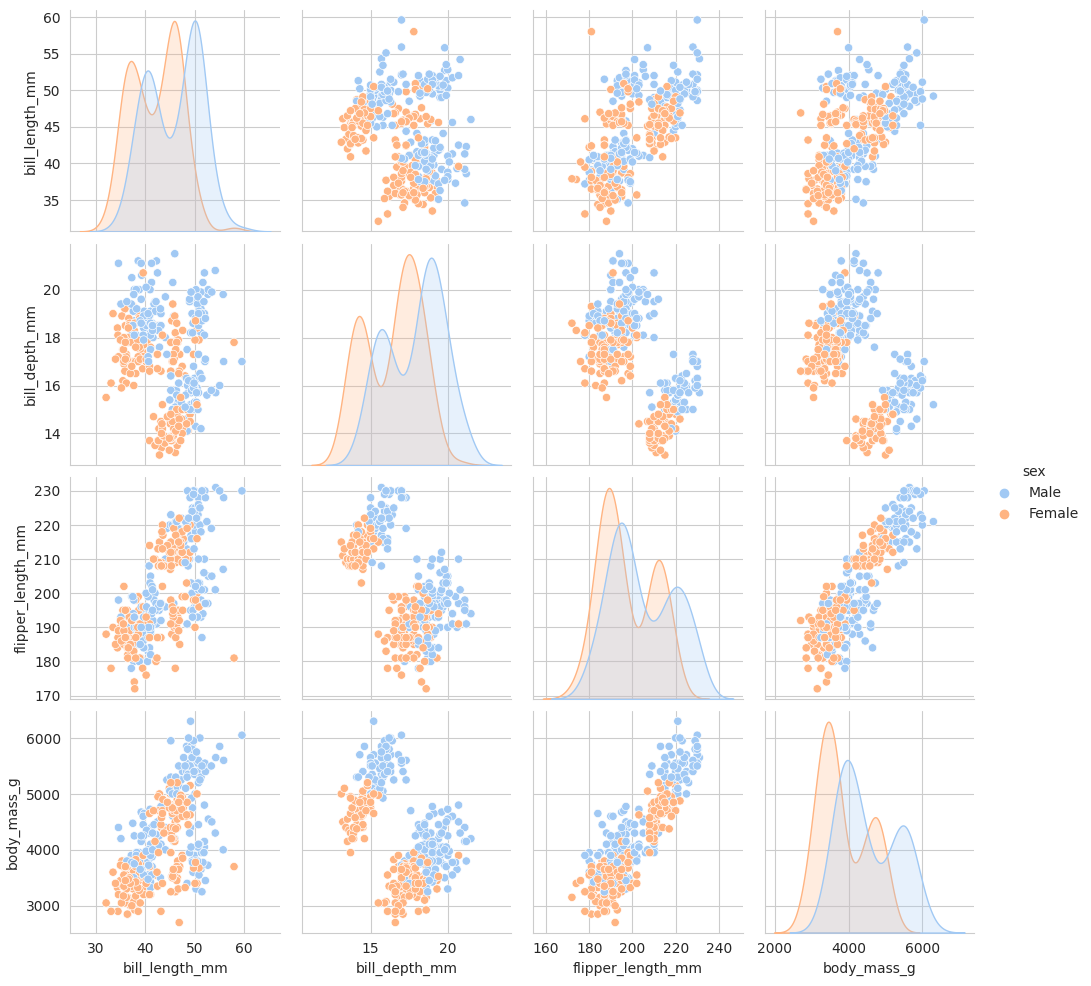

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** ?

Nos gráficos de área pode-se perceber que temos uma boa equiparação entre as populações do sexo masculino e feminino: ou seja, nos mesmos pontos de pico de um, também temos no outro. Com uma diferença mais acentuada no que ser refere ao ao comprimento da barbatana e massa do peso que os pontos de pico da população feminina é maior do que da população masculina.

Nos graficos de ponto podemos ver que houve uma boa separação e identificaçao da população feminina e masculina, quando utilizado o peso corporal (body_mass_g) como referencia. Ainda que o uso do comprimento da barbatana (flipper_length_mm) tenha sido melhor que os outros dois, é possivel notar uma certa confusão na separação do masculino e feminino que nao se nota na utilização do peso corporal. 

 - Atributos por espécie:

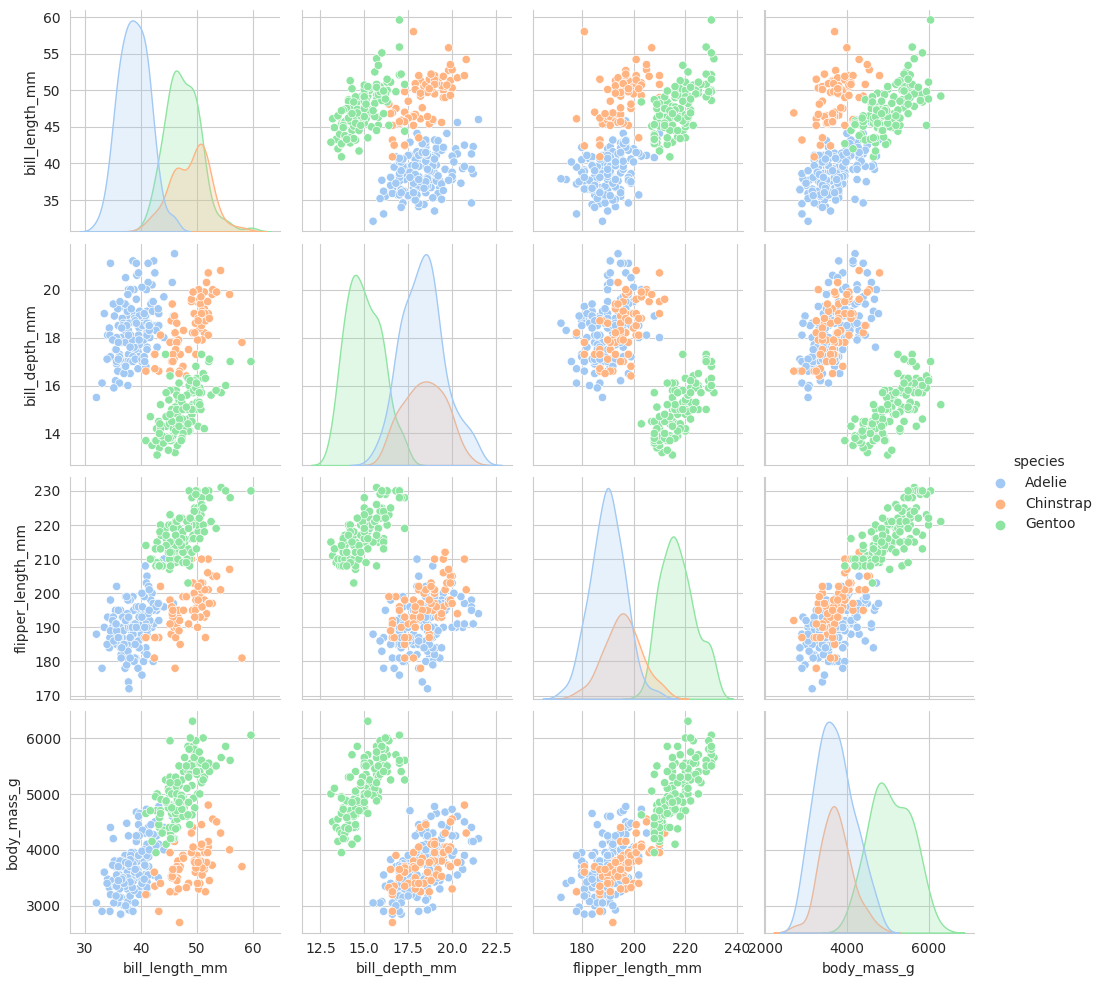

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** ?


No que se refere a especie, o uso da massa corporal (body_mass_g) não foi tão eficiente quanto na separação dos sexos. É notória a diferença que há no uso do comprimento (bill_length_mm): este é o que melhor performa a distinção entre as espécies. Nos demais quesitos utilizados, a unica forma clara de identificação entre as espécies é a Gentoo - havendo confusão entre as demais. 

 - Atributos por ilha:

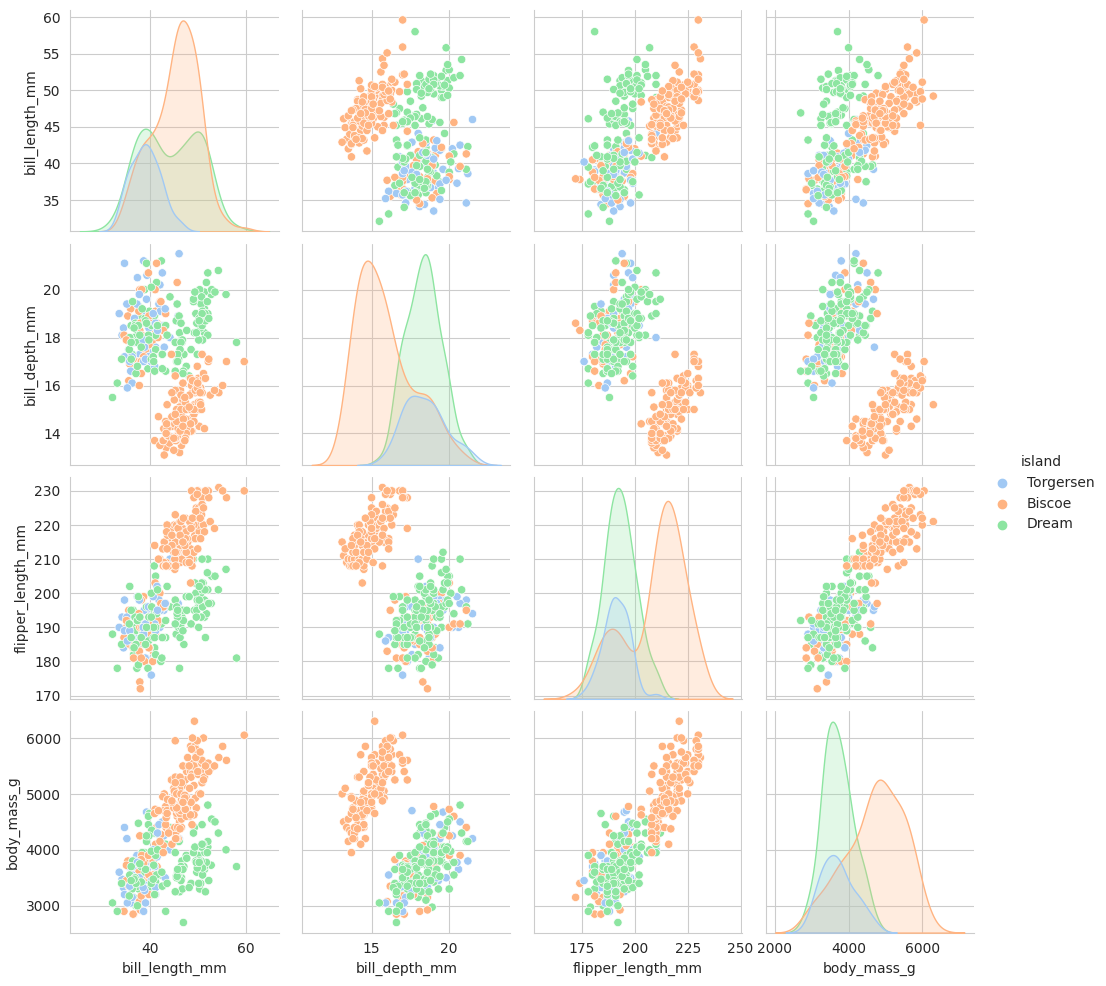

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** ?

Nos atributos da ilha, a unica forma de entender a diferença de caracterização é seguir pelo grafico de linhas. As separações entre elas pelos demais graficos há uma confusão com pelo duas das tres ilhas. 

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [17]:
# resposta da questão 2.1
penguim.isna().sum() /len(penguim)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

Uma percentagem muito pequena dos valores são nulos, o que poderia ser eliminado da base dde dados sem representar perda significativa

In [23]:
penguim = penguim.dropna(subset=['bill_length_mm'])
penguim = penguim.dropna(subset=['bill_depth_mm'])
penguim = penguim.dropna(subset=['flipper_length_mm'])
penguim = penguim.dropna(subset=['body_mass_g'])
penguim = penguim.dropna(subset=['sex'])

In [24]:
penguim.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [25]:
# resposta da questão 2.2
penguim.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [26]:
from sklearn.preprocessing import StandardScaler

# Inicializa o objeto StandardScaler
scaler = StandardScaler()

# Ajusta e transforma os dados da coluna para a escala padrão
penguim['bill_length_mm_std'] = scaler.fit_transform(penguim[['bill_length_mm']])
penguim['bill_depth_mm_std'] = scaler.fit_transform(penguim[['bill_depth_mm']])
penguim['flipper_length_mm_std'] = scaler.fit_transform(penguim[['flipper_length_mm']])
penguim['body_mass_g_std'] = scaler.fit_transform(penguim[['body_mass_g']])

In [27]:
penguim.dtypes

species                   object
island                    object
bill_length_mm           float64
bill_depth_mm            float64
flipper_length_mm        float64
body_mass_g              float64
sex                       object
bill_length_mm_std       float64
bill_depth_mm_std        float64
flipper_length_mm_std    float64
body_mass_g_std          float64
dtype: object

### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [9]:
# resposta da questão 2.3

### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [10]:
# resposta da questão 2.4

### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [11]:
# resposta da questão 2.5

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [12]:
# resposta da questão 3.1

### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [13]:
# resposta da questão 3.2

## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [14]:
# resposta da questão 4.1

---